# Probabilidad clásica

En probabilidad clásica (modelo laplaciano)

- Experimento aleatorio.
- Espacio muestral $\Omega$ (conjunto de todos los posibles resultados de un experimento aleatorio). Hipótesis $\# \Omega < +\infty$. 
- Eventos (diccionario con conjuntos).
- Si $\omega\in \Omega$, entonces $\{ \omega \}$ se le asigna una función $P: P(\Omega)\to [0,1]$
$$P(\{ \omega \})=\frac{1}{\# \Omega}.$$

En particular, si $A\in P(\Omega)$ (eventos) entonces
$$P(A)=\frac{\# A}{\# \Omega}.$$

## 1. Experimento: Lanzamiento de dos dados

Supongamos que estamos interesados en el experimento aleatorio de lanzar un par de dados honestos. De este experimento nos interesa saber cuál es la suma de los dados en cada tirada.

## 1.1. El espacio muestral

El espacio muestral $\Omega$ del experimento de lanzar dos dados honestos, está compuesto de todas las parejas ordenadas $(i,j)$ tales que $1\le i,j\le 6$ (enteros). Esto es 

$$\Omega=\{(i,j):1\le i,j\le 6\}=\{1,2,3,4,5,6\}\times \{1,2,3,4,5,6\}.$$


La cardinalidad de $\Omega$: $\# \Omega = 6^{2}=36$.

In [1]:
# usando itertools

from itertools import product

In [2]:
Omega = set(product([1, 2, 3, 4, 5, 6], repeat = 2))


In [3]:
len(Omega)

36

## 1.2. Eventos aleatorios

Sea $S_n$ el evento "La suma de los dados es $n$". Esto es:

$$S_n=\{(i,j)\in\Omega:i+j=n\}.$$


In [4]:
def S(n):
    Sn={(i,j) for i in range(1,7) for j in range(1,7) if i+j==n}
    return Sn

In [5]:
S(0) == S(1) == S(13)

True

In [6]:
S(9)

{(3, 6), (4, 5), (5, 4), (6, 3)}

¿Cuál sería la probabilidad de que la suma de los dos dados sea $9$:
    $$P(S(9))=\frac{4}{36}$$

Observación: 
    $$\sum_{i=2}^{12} P(S(i))=1.$$

## Otro tipo de eventos

Sea $T_n$ el evento "La resta de los dados es mayor que $n$". Esto es:

$$T_n=\{(i,j)\in\Omega:i-j\geq n\}.$$

In [7]:
def T(n):
    Tn=[(i,j) for i in range(1,7) for j in range(1,7) if i-j>=n]
    return Tn

In [8]:
T(2)

[(3, 1),
 (4, 1),
 (4, 2),
 (5, 1),
 (5, 2),
 (5, 3),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4)]

## 2. La variable aleatoria asociada a $S_{n}$

## 2.1 Definición de función de probabilidad

In [9]:
from fractions import Fraction

In [10]:
def P(A):
    P = Fraction(len(A), len(Omega))
    return P

In [11]:
S = {(i,j) : i+j for i,j in Omega}

In [12]:
from collections import defaultdict

dS = defaultdict(set)

In [13]:
for i, j in S.items():
        
    dS[j].add(i)

In [14]:
list(dS.items())

[(4, {(1, 3), (2, 2), (3, 1)}),
 (12, {(6, 6)}),
 (11, {(5, 6), (6, 5)}),
 (3, {(1, 2), (2, 1)}),
 (8, {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)}),
 (7, {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)}),
 (6, {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)}),
 (10, {(4, 6), (5, 5), (6, 4)}),
 (9, {(3, 6), (4, 5), (5, 4), (6, 3)}),
 (5, {(1, 4), (2, 3), (3, 2), (4, 1)}),
 (2, {(1, 1)})]

In [15]:
leyS = {i : P(A) for i, A in dS.items() }

leyS

{4: Fraction(1, 12),
 12: Fraction(1, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 8: Fraction(5, 36),
 7: Fraction(1, 6),
 6: Fraction(5, 36),
 10: Fraction(1, 12),
 9: Fraction(1, 9),
 5: Fraction(1, 9),
 2: Fraction(1, 36)}

## 2.2 Ley de una variable aleatoria

In [16]:
import pandas as pd

Tenemos una **variable aleatoria** 
$$S:\Omega \to \{2,3,4,5,6,7,8,9,10,11,12\}$$

La **ley de $S$** (o la distribución de probabilidad) está determinada por la pareja $\{(k, p_{k}), k\in\{2,3,4,5,6,7,8,9,10,11,12 \} \}$ en dónde
$$p_{k}=\mathbb{P}(\{\omega\in \Omega : S(\omega)=k\}).$$

In [17]:
ley_S = pd.Series(leyS)
ley_S.sort_index()

2     1/36
3     1/18
4     1/12
5      1/9
6     5/36
7      1/6
8     5/36
9      1/9
10    1/12
11    1/18
12    1/36
dtype: object

In [18]:
import numpy as np

def leyS(i):
    
    if i in range(2,13):
        x = ley_S[i]
    else:
        x = 0
    
    return x

In [19]:
rango_S = [k for k in range(2,13)]

p_k = [float(leyS(k)) for k in range(2,13)]

In [20]:
lS = pd.DataFrame(list(zip(rango_S, p_k)), index=[f"S_{i}" for i in range(2,13)],
               columns =['rango', 'densidad'])
lS 

,rango,densidad
S_2,2,0.027778
S_3,3,0.055556
S_4,4,0.083333
S_5,5,0.111111
S_6,6,0.138889
S_7,7,0.166667
S_8,8,0.138889
S_9,9,0.111111
S_10,10,0.083333
S_11,11,0.055556


<AxesSubplot:xlabel='rango'>

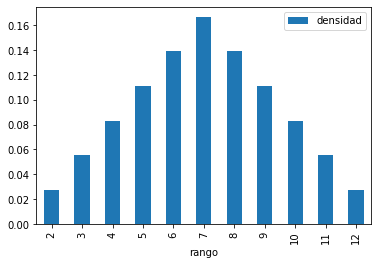

In [21]:
lS.plot.bar(x = 'rango', y='densidad')

## 3. Lanzamiento de una moneda

*Se tiene el siguiente experimento aleatorio:* Se lanzan, de manera independiente, 3 monedas justas. Sean $A=\{\text{cae águila}\}$ y $B=\{ \text{cae sol}\}$.

Entonces, el espacio de estados es
$$\Omega=\{A, S\}\times \{A, S\} \times \{A, S\}.$$

La cardinalidad de $\Omega$ es $\# \Omega=2^{3}=8.$

In [22]:
from itertools import product

Omega = set(product(["A", "S"], repeat=3))
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

Consideremos el evento $E:$ la cara de las tres monedas es "águila". En este caso, si se denota por $A_{i}$ al evento: el resultado del $i$-ésimo lanzamiento es *águila*, para $i=1,2,3$, entonces
$$E=A_{1}\cap A_{2}\cap A_{3}.$$

Representemos a los conjuntos $A_{i}$:

In [23]:
A_1 = {om for om in Omega if om[0]== "A"}

A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [24]:
A_2 = {om for om in Omega if om[1]== "A"}

A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [25]:
A_3 = {om for om in Omega if om[2]== "A"}

A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

El evento $E$ está representado como:

In [26]:
E = A_1.intersection(A_2.intersection(A_3))

E

{('A', 'A', 'A')}

El evento $E$ también puede se representado usando el método `.count`

In [27]:
E = {om for om in Omega if om.count("A")==3}

E

{('A', 'A', 'A')}

Por lo tanto,

In [28]:
P(E)

Fraction(1, 8)

En esta situación, podemos calcular la probabilidad del evento $F$: cae águila en el primero y segundo lanzamiento.

In [29]:
F = A_1.intersection(A_2.intersection(Omega))

P(F)

Fraction(1, 4)

## 3.1 Probabilidad condicional e independencia.

La probabilidad condicional, explica cómo cambia la probabilidad de un evento dado que se conoce la probabilidad de otro evento sujeto a las mismas condiciones.

**Definición.-** Sea $(\Omega,\mathcal{A},\mathbb{P})$ un espacio de probabilidad y $F\subset \Omega$ un evento asociado a cierto experimento aleatorio. Si $\mathbb{P}(F)>0$ (es decir, si $F$ ocurre con probabilidad positiva), entonces es posible considerar un nuevo espacio de probabilidad en donde el espacio muestral sea ahora $(F,\mathcal{A}_{F}=\mathcal{A}\cap F,\mathbb{P}(\bullet \mid F))$, en donde la función de probabilidad se define como:
$$\mathbb{P}(E\mid F)=\frac{\mathbb{P}(E\cap F)}{\mathbb{P}(F)},$$
para todo $E\in \mathcal{A}_{B}$.

In [30]:
def P_cond(E, F):
    return Fraction(len(E & F), len(F))

Consideremos el evento en $\Omega$: "El resultado del primer lanzamiento fue águila". Sabemos que tal evento está representado por $A_1$. Podemos preguntarnos entonces sobre la probabilidad del evento $E$ dada la ocurrencia del evento $E_{1}$.

In [31]:
P_cond(E, A_1)

Fraction(1, 4)

Tratemos de contestar a la siguiente pregunta: ¿Cuál es la probabilidad de que se obtenga "sol" en el segundo lanzamiento dado dado que se obtuvo "águila" en el primer lanzamiento? 

Sea $B_2$ el evento: se obtiene "sol" en el segundo lanzamiento. Representemos a tal evento:

In [32]:
B_2 = {om for om in Omega if om[1]== "S"}

B_2

{('A', 'S', 'A'), ('A', 'S', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

Entonces,

In [33]:
P_cond(B_2, A_1)

Fraction(1, 2)

Note que,

In [34]:
P_cond(B_2, A_1) == 1-P_cond(A_2, A_1)

True

## 3.2 Lanzamiento de monedas injustas (volados)

Sin embargo, existe la noción de **modelo de probabilidad frecuentista**: Bajo la hipótesis de que el espacio muestral es un conjunto finito, podemos definir la siguiente probabilidad asociada a un evento $A$
$$f_{n}(A)=\frac{n(A)}{n}$$
en donde $n(A)$ denota al número de veces que ocurre $A$.

Tenemos que 
$$f(A):=\lim_{n\to \infty}f_{n}(A)$$
tal modelo es más realista.

In [35]:
import random

In [36]:
def volado(p):
    return 'sol' if random.random() < p else 'águila'

Por ejemplo, si la moneda tiene carga en $A$ igual a $0.4$, podemos realizar una sucesión de lanzamientos y obtener las veces que cae "águila"

In [37]:
volado(0.4)

'águila'

In [38]:
a = [volado(0.4) for i in range(10)]

a

['águila',
 'águila',
 'sol',
 'águila',
 'sol',
 'águila',
 'sol',
 'águila',
 'águila',
 'águila']

In [39]:
a.count("sol")

3

In [40]:
resultados = []

for i in range(10):
        resultado = volado(0.7)
        resultados.append(resultado)
        
resultados

['sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'águila', 'águila', 'sol']

In [41]:
resultados.count("sol")

8

In [42]:
p = []
 
for i in range(1000):
     
    
    N = 10
    
    resultados =[]
    
    for i in range(N):
        resultado = volado(0.63)
        
        resultados.append(resultado)
        
    n_soles = resultados.count("sol")
    p_soles = n_soles/N
    p.append(p_soles)
 
# probabilidad promedio
p_soles_ = sum(p)/1000
 
print("Probabilidad {:.3f}".format(p_soles_))


Probabilidad 0.624


## 4. Urnas 

Una urna contiene $23$ bolas: $8$ blancas $(W)$, $6$ azúles $(B)$, and $9$ rojas $(R)$. Seleccionamos $6$ bolas al azar. Calculemos la probabilidad de los siguientes eventos:
1. todas sean rojas.
2. $3$ sean azules, $2$ sean blancas, and $1$ sea roja.
3. exactamente $4$ sean blancas.

Primero, etiquetamos cada bola en la urna:

In [43]:
def conc(A, B):

    return {a + b 
            for a in A for b in B}

In [44]:
urna = conc('W', '12345678') | conc('B', '123456') | conc('R', '123456789') 

urna

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

In [45]:
len(urna)

23

A continuación, vamos a definir nuestro **espacio de estados**. El método `itertools.combinations(iterable, r)`:
    
Retorna subsecuencias de longitud $r$ con elementos del iterable de entrada.

Las tuplas de combinación se emiten en orden lexicográfico según el orden de la entrada iterable. Entonces, si la entrada iterable está ordenada, las tuplas de combinación se producirán en una secuencia ordenada.

Los elementos son tratados como únicos basados en su posición, no en su valor. De esta manera, si los elementos de entrada son únicos, no habrá valores repetidos en cada combinación

In [46]:
import itertools

def comb(items, n):

    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}

Seleccionamos $6$ bolas de la urna:

In [47]:
Omega = comb(urna, 6)

In [48]:
len(Omega)

100947

### Solución a 1.

In [49]:
R6 = {s for s in Omega if s.count('R') == 6}

P(R6)

Fraction(4, 4807)

### Solución a 2.

In [50]:
B3W2R1 = {s for s in Omega if
          s.count('B') == 3 and s.count('W') == 2 and s.count('R') == 1}

P(B3W2R1)

Fraction(240, 4807)

### Solución a 3.

In [51]:
W4 = {s for s in Omega if
      s.count('W') == 4}

P(W4)

Fraction(350, 4807)

Se tienen $2$ urnas, cada una de las cuales contiene $10$ bolas numeradas del $1$ al $10$. Un experimento
aleatorio consiste en seleccionar al azar una bola de cada urna. Calcula la probabilidad de que los números de las dos bolas seleccionadas difieran por $2$ o más.

<p style="color:red;">Solución. 
    
 Se tiene que el espacio muestral asociado al experimento aleatorio es $\Omega=\{1,2,\dots,10\}\times \{1,2,\dots,10\}$. La forma de visualizar a $\Omega$ es por medio del siguiente arreglo:
$$\Omega=\left(\begin{array}{ccccc}
(1,1) & (1,2) & \cdots & (1,10) \\
(2,1) & (2,2) & \cdots & (2,10) \\
\vdots & \vdots & \ddots  & \vdots \\
(9,1) & (9,2) & \cdots & (9,10) \\
(10,1) & (10,2) & \cdots & (10,10) \end{array} \right).$$ 
    
Se observa que $|\Omega|=100$. 

Considere el siguiente evento:

$A:$ el evento "el número de las bolas seleccionadas difiere por $2$ o más". 

Entonces, el conjunto asociado al evento $A$ es:
$$A=\{(i,j)\in \Omega \ | \ |i-j|\geq 2\}.$$
 
Para $k\in \{1,2,\dots, 8\}$ fijo, denotemos también por $A^{k}$ al evento de $A$ dado por:

$$A^{k}=\{j\in \{1,\dots, 10\} \ | \ j-k\geq 2 \}.$$

Entonces, 
\begin{align*}
A^{1}&=\{(1,3),(1,4), (1,5), (1,6), (1,7), (1,8), (1,9), (1,10)\}\\
A^{2}&=\{(2,4), (2,5), (2,6), (2,7), (2,8), (2,9), (2,10)\}\\
A^{3}&=\{(3,5), (3,6), (3,7), (3,8), (3,9), (3,10)\}\\
A^{4}&=\{(4,6), (4,7), (4,8), (4,9), (4,10)\}\\
A^{5}&=\{(5,7), (5,8), (5,9), (5,10)\}\\
A^{6}&=\{(6,8), (6,9), (6,10)\}\\
A^{7}&=\{(7,9), (7,10)\}\\
A^{8}&=\{(8,10)\}\\
\end{align*} 

Para $\ell\in \{3,\dots, 10\}$ fijo, denotemos también por $A_{\ell}$ al evento de $A$ dado por:

$$A_{\ell}=\{i\in \{1,\dots, 10\} \ | \ \ell-i\geq 2 \}.$$

Entonces, 
\begin{align*}
A_{3}&=\{(3,1)\}\\
A_{4}&=\{(4,1), (4,2)\}\\
A_{5}&=\{(5,1), (5,2), (5,3)\}\\
A_{6}&=\{(6,1), (6,2), (6,3), (6,4)\}\\
A_{7}&=\{(7,1), (7,2), (7,3), (7,4), (7,5)\}\\
A_{8}&=\{(8,1), (8,2), (8,3), (8,4), (8,5), (8,6)\}\\
A_{9}&=\{(9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7)\}\\
A_{10}&=\{(10,1), (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8)\}\
\end{align*} 

Note la siguiente igualdad:
$$A=\bigcup_{k=1}^{8}A^{k}\cup \bigcup_{\ell=3}^{10}A_{\ell}.$$

Observe también lo siguiente:
\begin{align*}
\#A^{1}&=\#A_{10}=8\\
\#A^{2}&=\#A_{9}=7\\
\#A^{3}&=\#A_{8}=6\\
\#A^{4}&=\#A_{7}=5\\
\#A^{5}&=\#A_{6}=4\\
\#A^{6}&=\#A_{5}=3\\
\#A^{7}&=\#A_{4}=2\\
\#A^{8}&=\#A_{3}=1.
\end{align*}

De esta forma, 
\begin{align*} 
\#A&=\sum_{k=1}^{8}\#A^{k}+\sum_{\ell=3}^{10}\#A_{\ell}\\
&=8+7+6+5+4+3+2+1+1+2+3+4+5+6+7+8\\
&=2\left(\frac{8\times 9}{2}\right)\\
&=72.
\end{align*} 

Finalmente, ya que estamos en un espacio de probabilidad de Laplace,
$$\mathbb{P}(A)=\frac{\#A}{\#\Omega}=\frac{72}{100}.$$

Una solución del problema que resulta ser más eficaz es usando la propiedad de que, en cualquier espacio de probabilidad (en nuestra situación nos encontramos en un espacio de Laplace), se cumple
$$\mathbb{P}(A^{c})=1-\mathbb{P}(A).$$

Aquí, el evento "no sucede A", como conjunto, tiene la forma
$$A^{c}=\{(i,j)\in \Omega \ | \ |i-j|\leq 1 \}.$$
En este caso,
$$A^{c}=\bigcup_{i=1}^{10}\{(i,i)\}\cup \bigcup_{i=1}^{9}\left(\{(i,i+1) \}\cup \{(i+1,i)\}\right).$$
Por lo tanto, 
$$\#A^{c}=10+9+9=28,$$
y
$$\mathbb{P}(A^{c})=1-\frac{28}{100}=\frac{72}{100}.$$

In [52]:
from itertools import product

Omega = set(product([i for i in range(1,11)], repeat=2))

len(Omega)

100

In [53]:
A = {(i, j) for i,j in Omega if abs(i-j)>=2}

P(A)

Fraction(18, 25)